In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [38]:
#load the data
df=pd.read_csv("Customer Churn.csv")

# Exploratory Data Analysis and Preprocessing

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
#change the data types of TotalCharges into float
df['TotalCharges']=df['TotalCharges'].replace(' ',0)
df['TotalCharges']=df['TotalCharges'].astype('float')

In [42]:
#describe the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
#check the null values and duplicated values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:"False",1:"True"})

# countdown the churn

[Text(0, 0, '2549'), Text(0, 0, '939')]

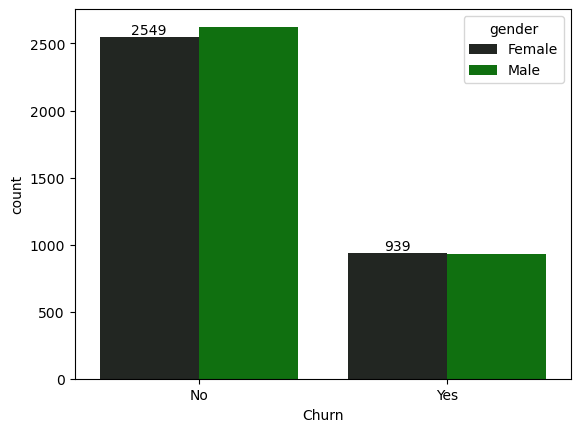

In [46]:
ax=sns.countplot(x='Churn',data=df,color='green',hue='gender')
ax.bar_label(ax.containers[0])

([<matplotlib.patches.Wedge at 0x22dd7ff9e50>,
 [Text(-0.7393678155529122, 0.8144539479458092, 'No'),
  Text(0.8737986411057732, -0.9625361992162706, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704413, '73.46%'),
  Text(0.5377222406804758, -0.5923299687484742, '26.54%')])

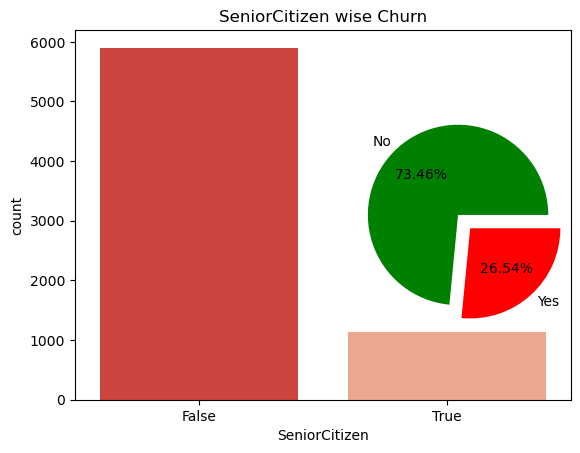

In [47]:
plt.subplot(1,1,1)
sns.countplot(x='SeniorCitizen',data=df,palette='Reds_r')
plt.title("SeniorCitizen wise Churn")

plt.subplot(1,2,2)
data=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(data['Churn'],labels=data['Churn'].index,autopct='%.2f%%',explode=[0,0.2],colors=['green','red'])

# countdown the partner by churn

[Text(0, 0, '3402'), Text(0, 0, '3641')]

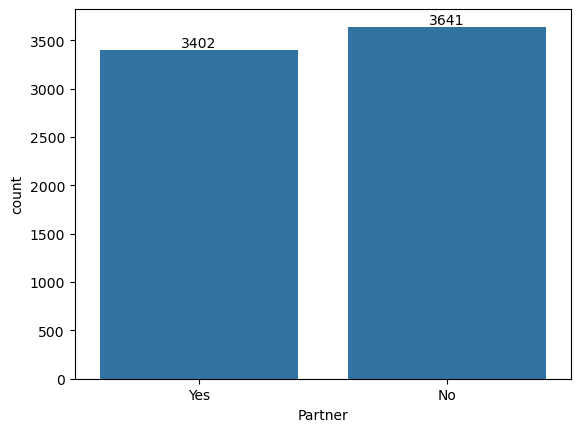

In [48]:
z=df.groupby('Partner')['Churn'].count().reset_index()
ax=sns.countplot(x='Partner',data=df)
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'The histplot of tenure')

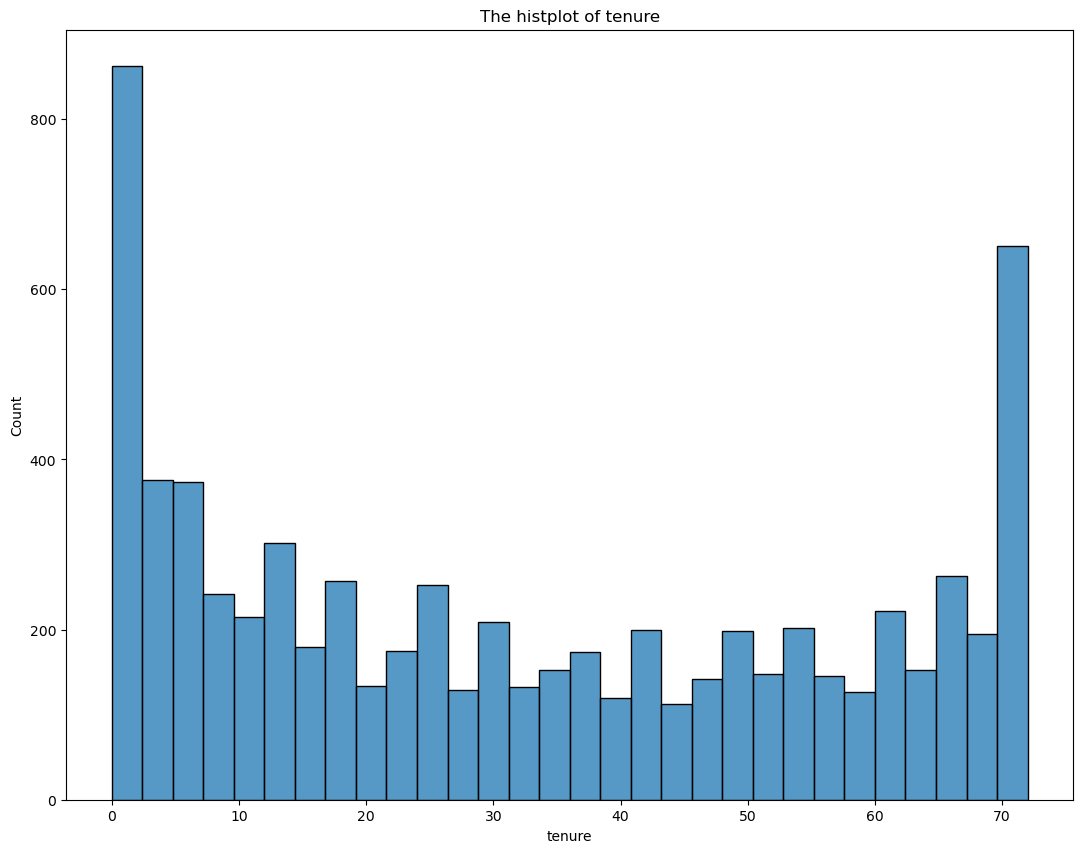

In [49]:
#create a histoplot of tenure
plt.figure(figsize=(13,10))
sns.histplot(x='tenure',data=df,bins=30)
plt.title("The histplot of tenure")

Text(0.5, 1.0, 'Device protection wise program')

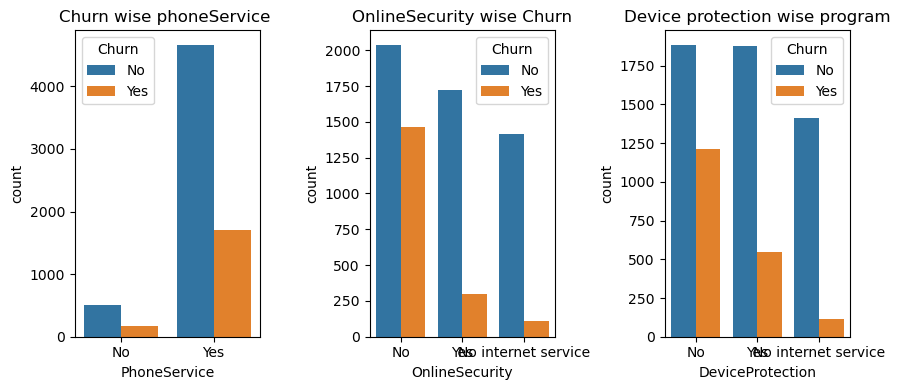

In [50]:
#countdown the some columns
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.countplot(x='PhoneService',data=df,hue='Churn')
plt.title("Churn wise phoneService ")
plt.tight_layout()

plt.subplot(1,3,2)
sns.countplot(x='OnlineSecurity',data=df,hue='Churn')
plt.tight_layout()
plt.title("OnlineSecurity wise Churn")

plt.subplot(1,3,3)
sns.countplot(x='DeviceProtection',data=df,hue='Churn')
plt.tight_layout()
plt.title("Device protection wise program")



# Churn vs Totalcharges

Text(0.5, 1.0, 'Churn vs Average Totalcharges')

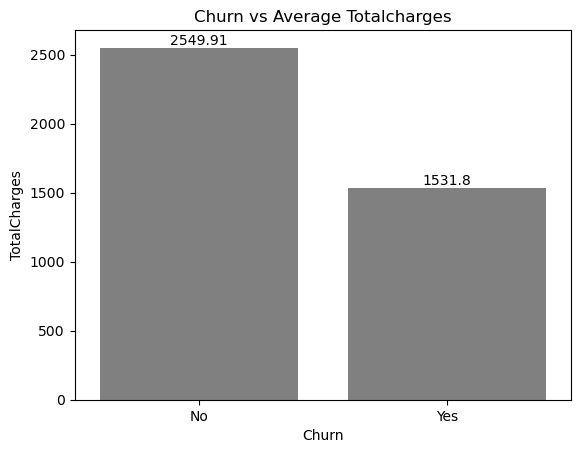

In [51]:
data=df.groupby('Churn')['TotalCharges'].mean().reset_index()
ax=sns.barplot(x='Churn',y='TotalCharges',data=data,color='grey')
ax.bar_label(ax.containers[0])

plt.title("Churn vs Average Totalcharges")

In [52]:
#create a function to convert the ruppes into dollars
def format_value(value):
    if value>1000000:
        return f"{value/1000000:.2f}M"
    elif value>1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)

Text(0, 0.5, 'TotalCharges')

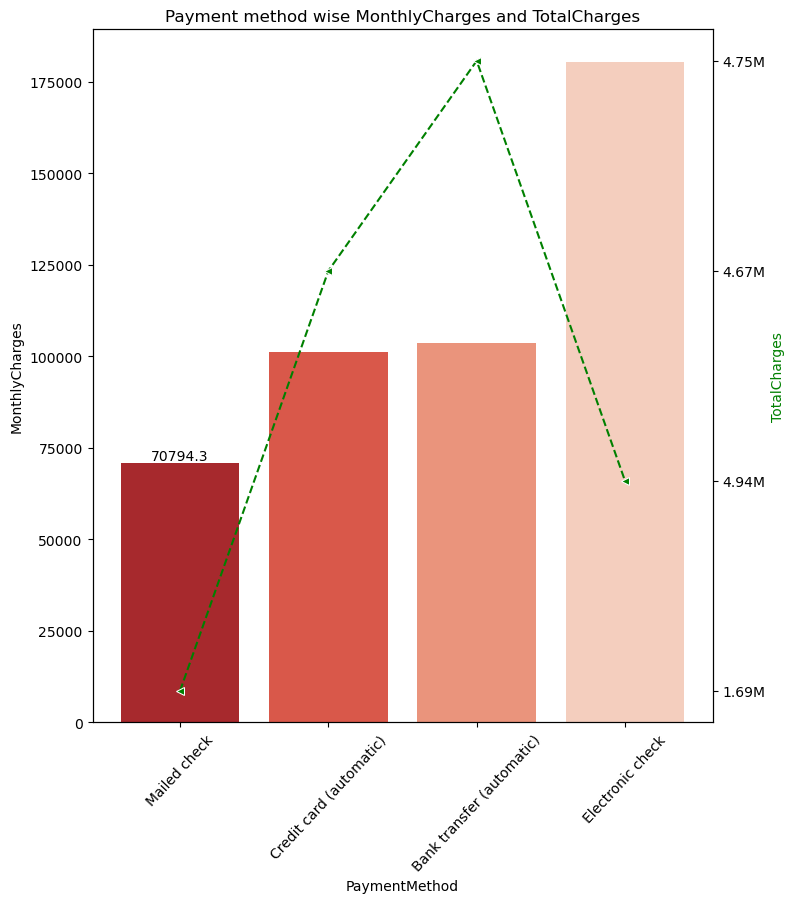

In [53]:
plt.figure(figsize=(8,9))
data=df.groupby('PaymentMethod')['MonthlyCharges'].sum().sort_values(ascending=True).reset_index()
ax=sns.barplot(x='PaymentMethod',y='MonthlyCharges',data=data,palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=47)
plt.title("Payment method wise MonthlyCharges and TotalCharges")

ax2=ax.twinx()
total_charges=df.groupby('PaymentMethod')['TotalCharges'].sum().reset_index()
total_charges['TotalCharges']=total_charges['TotalCharges'].apply(format_value)
sns.lineplot(x='PaymentMethod',y='TotalCharges',linestyle='--',marker='<',data=total_charges,ax=ax2,color='green')
ax2.set_ylabel("TotalCharges",color='green')

<Axes: >

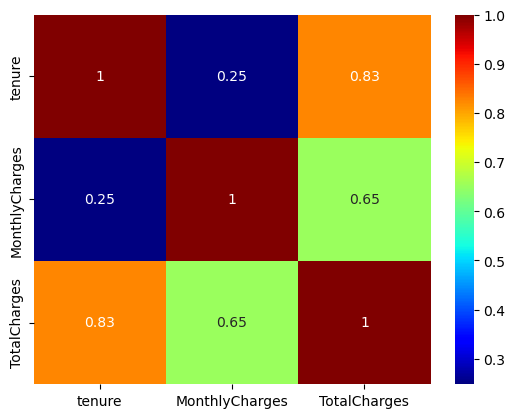

In [54]:
# check the correlation between each to another column
df2=df.select_dtypes(include=[np.number])
sns.heatmap(df2.corr(),annot=True,cmap='jet')

# from heatmap we can see the strong correlation is 0.83 between tenure and totalcharges and another is 0.65 between Totalcharge and monthlycharges

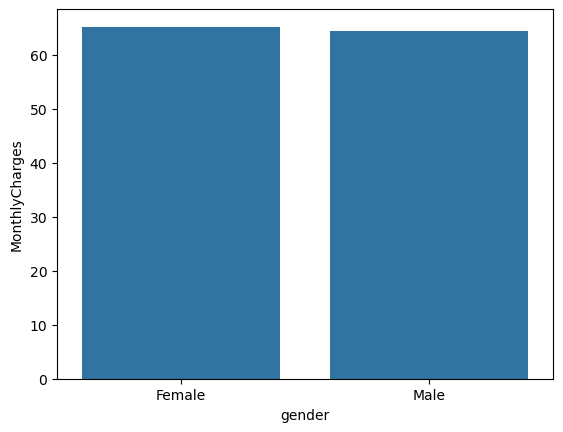

In [55]:
#gender wise average monthlychareges
charges=df.groupby('gender').agg({'MonthlyCharges':'mean','TotalCharges':'mean'}).reset_index()
ax=sns.barplot(x='gender',y='MonthlyCharges',data=charges)

[Text(0, 0, '2220'), Text(0, 0, '1307'), Text(0, 0, '1647')]

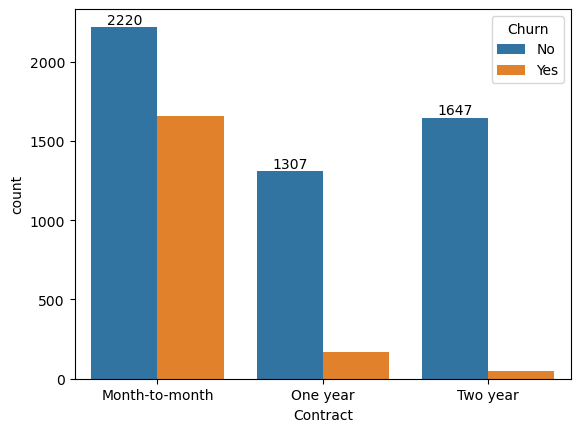

In [56]:
#count of customer by contract
ch=sns.countplot(x='Contract',data=df,hue='Churn')
ch.bar_label(ch.containers[0])

#### people who have month -to -month contract are likely to churn then from one year contract and two year

In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

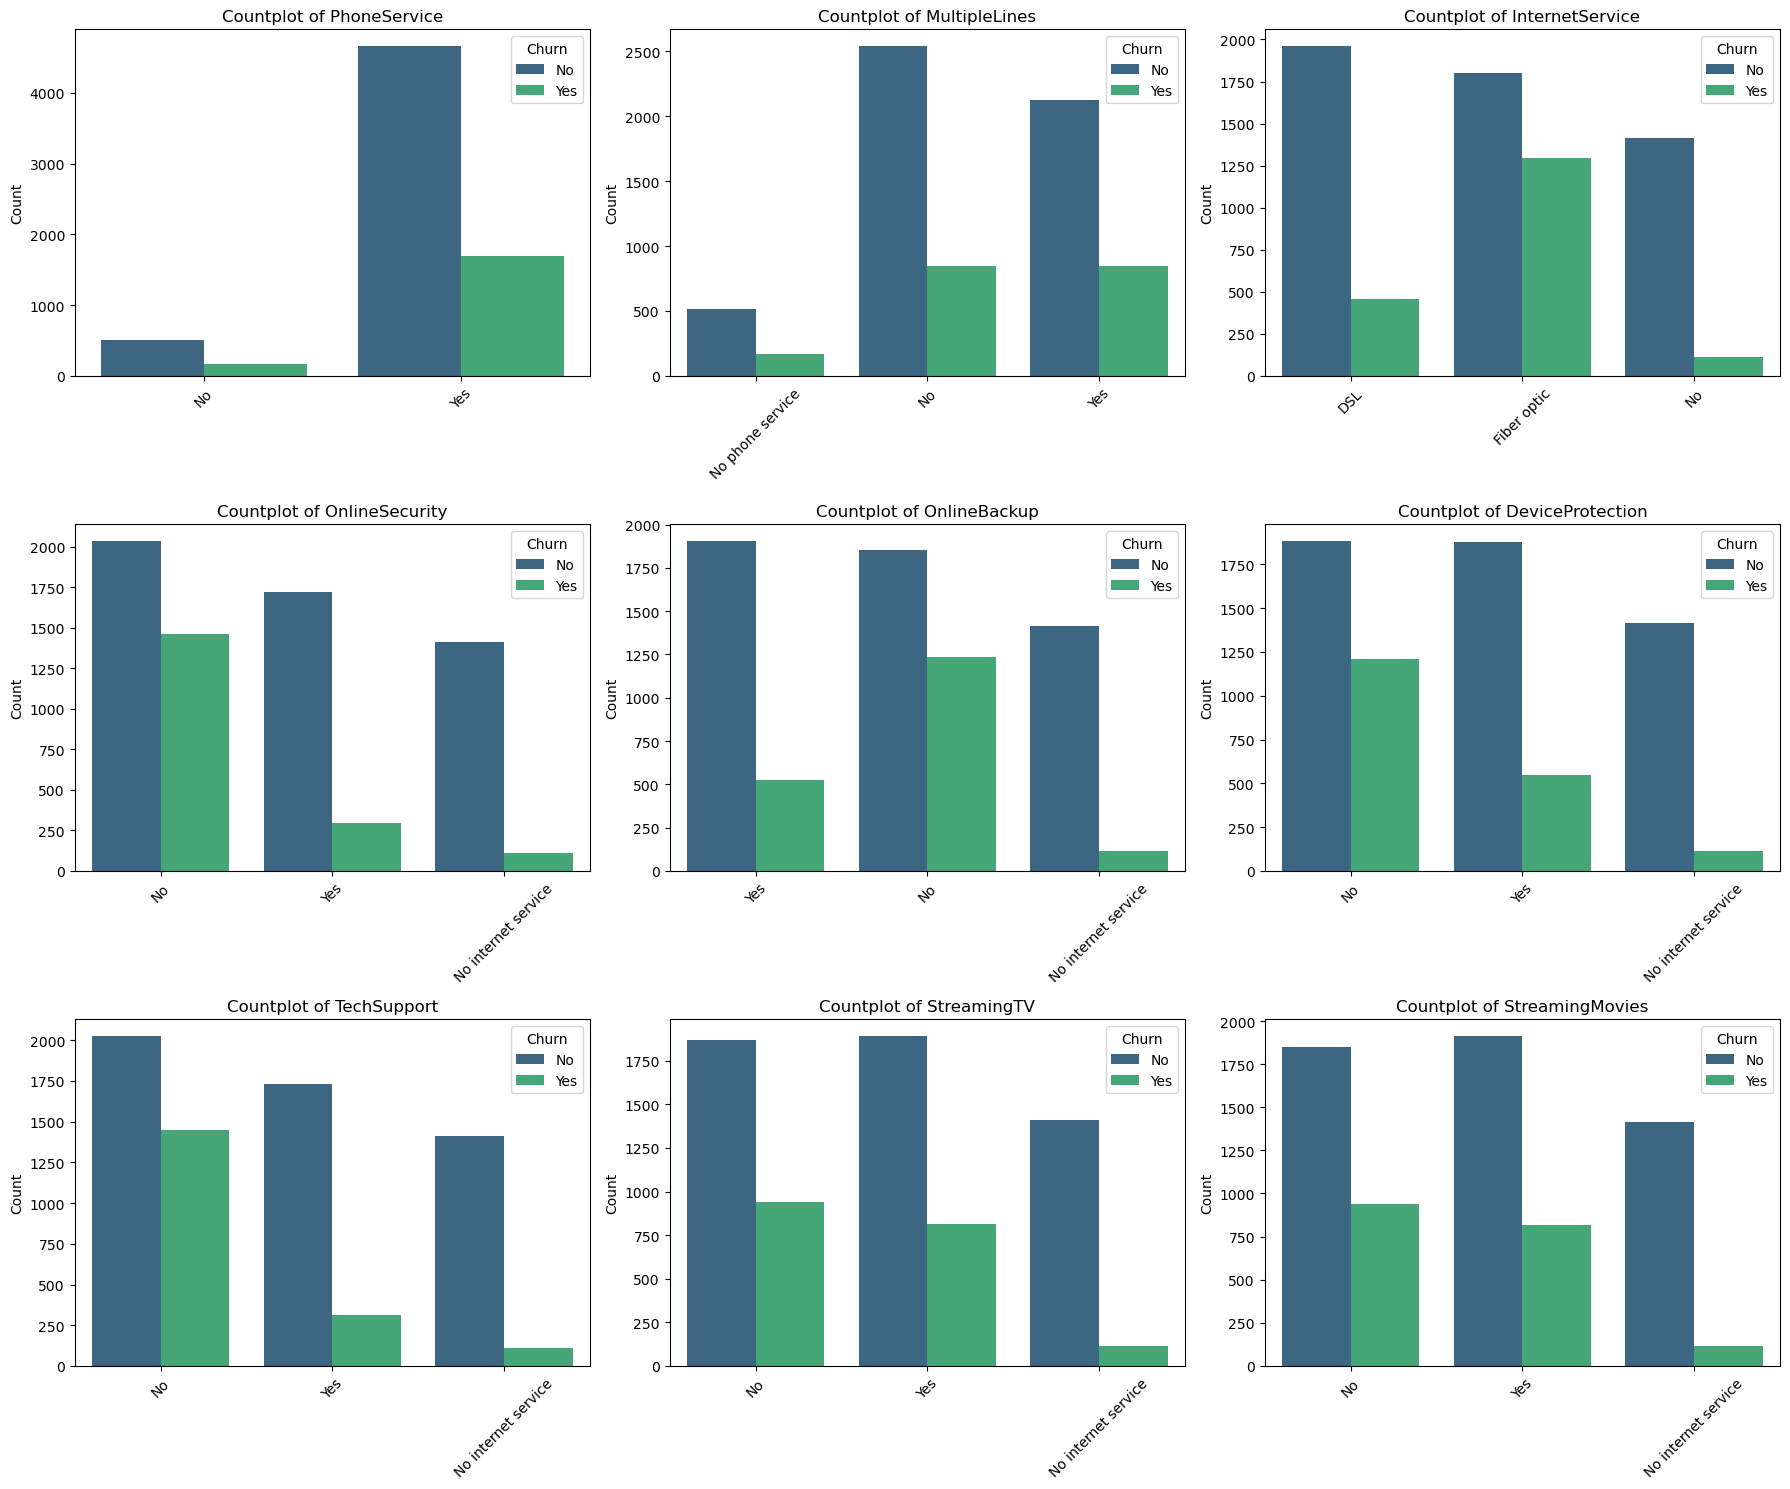

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create grid size (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis",hue=df['Churn'])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()


### The chart shows that customers without additional services such as OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies are significantly more likely to churn compared to those who subscribe to these features, indicating that low service engagement is a major churn driver. Fiber optic users also exhibit noticeably higher churn than DSL users, suggesting potential dissatisfaction with this internet service type, while customers with no internet service churn the least. In contrast, PhoneService and MultipleLines show weaker relationships with churn and appear to be less influential. Overall, churn is strongly associated with internet service type and the absence of add-on services, with highly engaged, multi-service customers being far more likely to stay

# countdown the  payment method wise churn person

Text(0, 0.5, 'Countplot of Payment Method')

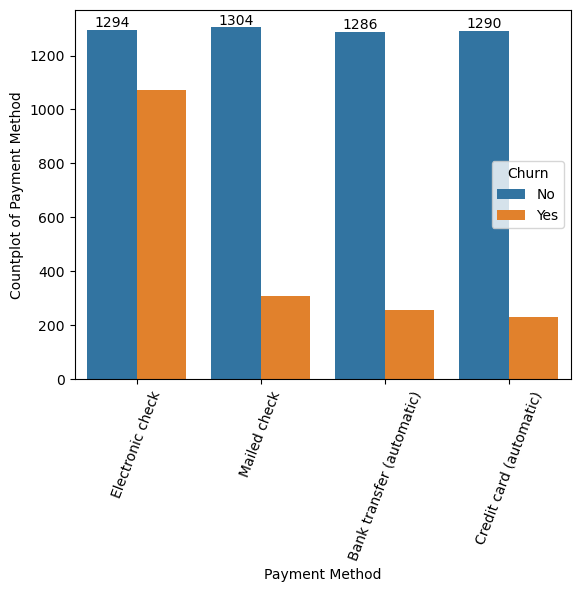

In [68]:
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=69)
plt.xlabel("Payment Method")
plt.ylabel("Countplot of Payment Method")

# customer is likely to churn when they are using Electronic check payment method